# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

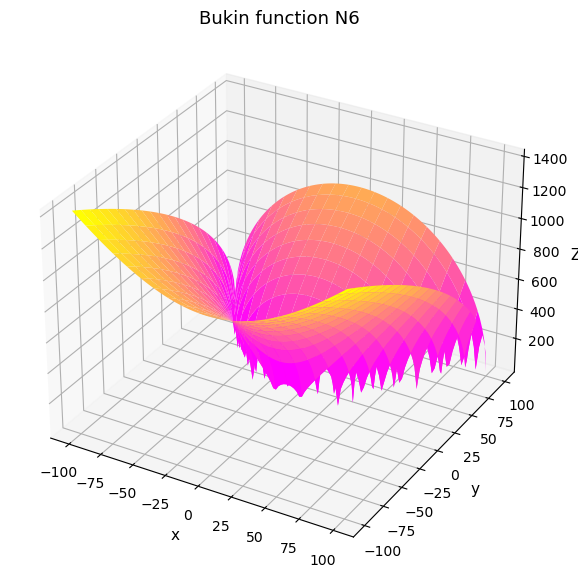

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01*(x * x))) + 0.01 * np.abs(x + 10)

x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap="spring")
ax.set_title("Bukin function N6", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 11)
plt.show()


*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [4]:
#initial state
start_x = -10
start_y = -3

end_x = -5
end_y = 3

step = 1
tol = 0 # tolerance value=stop criterion

while(start_x <= end_x and start_y <= end_y):
    
    current_value = f(start_x, start_y)
    
    left_value = f(start_x - step, start_y)
    right_value = f(start_x + step, start_y)
    down_value = f(start_x, start_y - step)
    up_value = f(start_x, start_y + step)
    
    min_value = min(left_value, right_value, down_value, up_value)
   
    if min_value < current_value:
        if min_value == left_value:
            start_x -= step
        elif min_value == right_value:
            start_x += step
        elif min_value == down_value:
            start_y -= step
        else:
            start_y += step
    else:
        break
        
    if abs(min_value - current_value) <= tol:
        break
    
min_point = (start_x, start_y)
min_value = f(start_x, start_y)

print(min_point, min_value)

(-10, 1) 0.0


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [5]:
def knapsack_value(solution, values, weights, capacity):
    total_value = np.sum(solution * values)
    total_weight = np.sum(solution * weights)
    
    if total_weight > capacity:
        total_value -= (total_weight - capacity) * np.mean(values)
    
    return total_value

def hill_climbing_knapsack(values, weights, capacity, max_iterations=1000):
    n = len(values)
    current_solution = np.zeros(n) # empty string of n zeros
    
    current_value = knapsack_value(current_solution, values, weights, capacity)
    
    for _ in range(max_iterations): # neighbour creation
        neighbor_solution = current_solution.copy()
        index = np.random.randint(n)
        neighbor_solution[index] = 1 - neighbor_solution[index]
        
        neighbor_value = knapsack_value(neighbor_solution, values, weights, capacity)
        
        if neighbor_value > current_value:
            current_solution = neighbor_solution
            current_value = neighbor_value
        
        if np.all(current_solution == 1) or np.all(current_solution == 0): # stop criterion
            break
    
    return current_solution.astype(int)

values = np.array([10, 25, 15, 30, 20])
weights = np.array([5, 10, 8, 15, 12])
capacity = 30

solution = hill_climbing_knapsack(values, weights, capacity)

print(solution, ": ", knapsack_value(solution, values, weights, capacity))

# global optimum: [1 1 0 1 0]: 65
# gets stuck in local optima due to neighbour creation

[1 1 0 1 0] :  65



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [6]:
def hill_climbing_knapsack_improved(values, weights, capacity, num_restarts=10, max_iterations=1000):
    best_solution = None
    best_value = -np.inf
    
    for _ in range(num_restarts):
        solution = hill_climbing_knapsack(values, weights, capacity, max_iterations)
        value = knapsack_value(solution, values, weights, capacity)
        
        if value > best_value:
            best_solution = solution
            best_value = value
    
    return best_solution

solution = hill_climbing_knapsack_improved(values, weights, capacity)
print(solution, ": ", knapsack_value(solution, values, weights, capacity))


[1 1 0 1 0] :  65
